In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.base import BaseEstimator, TransformerMixin


In [37]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
print("Dimensions du dataset :", df.shape)
print("\nValeurs manquantes par colonne :\n", df.isna().sum())
print("\nTypes de données :\n", df.dtypes)


Dimensions du dataset : (891, 15)

Valeurs manquantes par colonne :
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Types de données :
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [38]:
print(df.info())
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


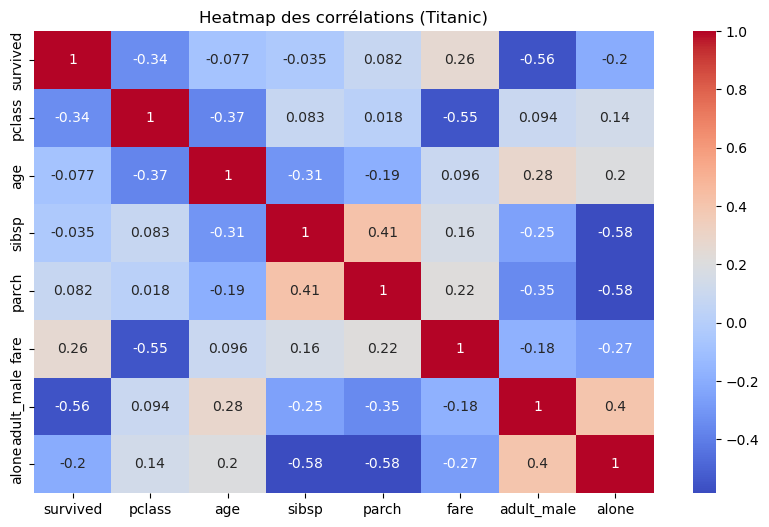

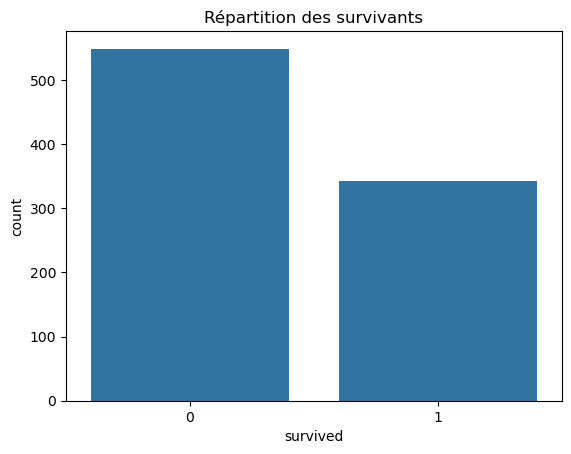

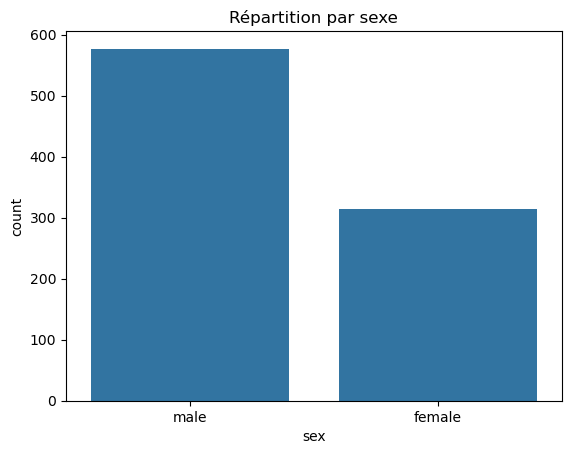

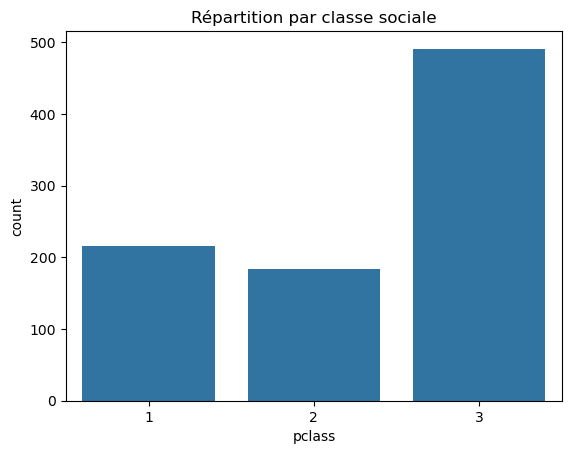

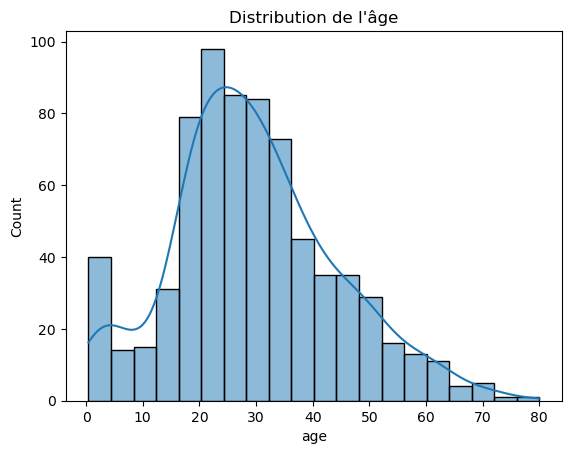

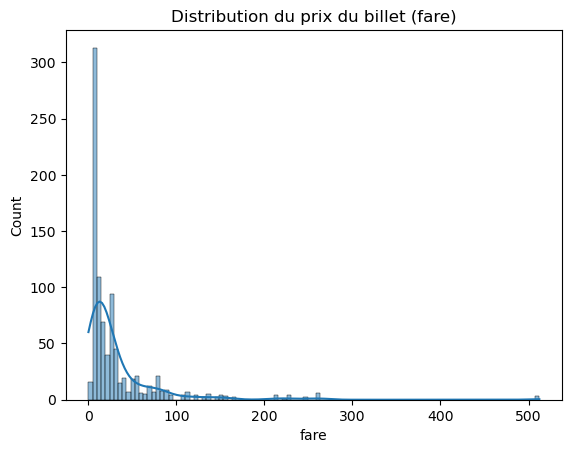

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap des corrélations (Titanic)")
plt.show()


# Countplot des survivants
sns.countplot(data=df, x='survived')
plt.title("Répartition des survivants")
plt.show()

# Countplot du sexe
sns.countplot(data=df, x='sex')
plt.title("Répartition par sexe")
plt.show()

# Countplot de la classe (pclass)
sns.countplot(data=df, x='pclass')
plt.title("Répartition par classe sociale")
plt.show()

# Histogramme de l'âge
sns.histplot(data=df, x='age', kde=True)
plt.title("Distribution de l'âge")
plt.show()

# Histogramme du prix du billet (fare)
sns.histplot(data=df, x='fare', kde=True)
plt.title("Distribution du prix du billet (fare)")
plt.show()

In [10]:
data = df.copy()

# Family size
data['family_size'] = data['sibsp'].fillna(0) + data['parch'].fillna(0) + 1

# Is Alone
data['is_alone'] = (data['family_size'] == 1).astype(int)

# Affichage pour vérifier
data[['family_size', 'is_alone']].head()


,family_size,is_alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [12]:
drop_cols = ['deck', 'embark_town', 'alive', 'who', 'adult_male']
for c in drop_cols:
    if c in data.columns:
        data = data.drop(columns=c)

target = 'survived'
y = data[target]
X = data.drop(columns=[target])

data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,True,1,1


In [14]:
#categorical encoding
numeric_features = ['age', 'fare', 'family_size']
categorical_features = ['sex', 'pclass', 'embarked', 'title']

# Garde seulement celles présentes
numeric_features = [c for c in numeric_features if c in X.columns]
categorical_features = [c for c in categorical_features if c in X.columns]

numeric_features, categorical_features


(['age', 'fare', 'family_size'], ['sex', 'pclass', 'embarked'])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fare', 'family_size']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'pclass', 'embarked'])])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape



((712, 11), (179, 11))

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pipeline Logistic Regression
pipe_lr = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Entraînement
pipe_lr.fit(X_train, y_train)

# Prédictions
y_pred_lr = pipe_lr.predict(X_test)

# Affichage résultats
print("=== LOGISTIC REGRESSION ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

=== LOGISTIC REGRESSION ===
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[97 13]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline Random Forest
pipe_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Entraînement
pipe_rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = pipe_rf.predict(X_test)

# Résultats
print("=== RANDOM FOREST CLASSIFIER ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


=== RANDOM FOREST CLASSIFIER ===
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[97 13]
 [22 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline KNN
pipe_knn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Entraînement
pipe_knn.fit(X_train, y_train)

# Prédiction
y_pred_knn = pipe_knn.predict(X_test)

# Résultats
print("=== KNN CLASSIFIER ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

=== KNN CLASSIFIER ===
Accuracy: 0.7877094972067039
Confusion Matrix:
 [[95 15]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [41]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy Logistic Regression :", acc_lr)
print("Accuracy KNN :", acc_knn)
print("Accuracy Random Forest :", acc_rf)

if acc_lr > acc_knn and acc_lr > acc_rf:
    print("\n>>> Logistic Regression est le meilleur modèle.")
elif acc_knn > acc_lr and acc_knn > acc_rf:
    print("\n>>> KNN est le meilleur modèle.")
elif acc_rf > acc_lr and acc_rf > acc_knn:
    print("\n>>> Random Forest est le meilleur modèle.")
else:
    print("\n>>> Deux modèles ont des performances similaires.")


Accuracy Logistic Regression : 0.7988826815642458
Accuracy KNN : 0.7877094972067039
Accuracy Random Forest : 0.8044692737430168

>>> Random Forest est le meilleur modèle.
